# **MLP PROJECT - Recipe for Rating: Predict Food Ratings using ML**

**Goal** - To build models that help predict the rating of a particular food recipe.

In [1]:
# Step 1 - Import all important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2 - Load datasets

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [3]:
# Step 2 - Load datasets (continued)

train_set = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
testset = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")

# **Exploratory Data Analysis (EDA) : Understanding the Data**

In [4]:
# To check the number of rows and columns in the dataset.

print('The number of rows and columns in Training Dataset: ', train_set.shape)
print('The number of rows and columns in Test Dataset: ', testset.shape)

The number of rows and columns in Training Dataset:  (13636, 15)
The number of rows and columns in Test Dataset:  (4546, 14)


In [5]:
# To view to training dataset

train_set

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...


In [6]:
# To view to test dataset

testset

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,152,32,17310,Seafood Lasagna,sp_aUSaElGf_17310_c_310012,u_1oKYP0QIv00q3K9Z5U0TosT5gYx,jsantullo,1,1622717899,0,0,0,100,This is an absolutely wonderful seafood recipe...
4542,121,74,26937,Pineapple Pudding Cake,sp_aUSaElGf_26937_c_331905,u_1oKVlhuSfIH4M8gwWLvmkvs3215,homeoftaste,1,1622717990,0,0,0,100,This us a definite &#34;OMG&#34;. Tastes sinf...
4543,133,73,41095,Contest-Winning New England Clam Chowder,sp_aUSaElGf_41095_c_112060,u_1oKVb3oC9QR5uDI8OqeaPncMtBe,cmfisher,1,1622716903,0,0,0,100,absolutely great....even husband and grandson ...
4544,91,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_391682,u_1oKcs7T7xAY63ZrRKCwH8ccshww,danalu8,1,1622718289,0,0,1,100,I followed directions. It tastes very bland. V...


In [7]:
# To view basic gist about the training dataset

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


**Insights:**

Total no. of entries : **13636**

Total no. of columns : **14 Features** + **1 Label**

**Label Column:** **'Rating'**

**Feature Columns:** 'ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID', 'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore', 'Recipe_Review'

There are 10 numerical columns and 5 categorical columns.

**Numerical Columns:** 'ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore'.

**Categorical Columns:** 'RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review'.

**Important Observation:** 'Recipe_Review' contains **2 missing datapoints**.

In [8]:
# To view basic gist about the test dataset

testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4546 non-null   int64 
 1   RecipeNumber       4546 non-null   int64 
 2   RecipeCode         4546 non-null   int64 
 3   RecipeName         4546 non-null   object
 4   CommentID          4546 non-null   object
 5   UserID             4546 non-null   object
 6   UserName           4546 non-null   object
 7   UserReputation     4546 non-null   int64 
 8   CreationTimestamp  4546 non-null   int64 
 9   ReplyCount         4546 non-null   int64 
 10  ThumbsUpCount      4546 non-null   int64 
 11  ThumbsDownCount    4546 non-null   int64 
 12  BestScore          4546 non-null   int64 
 13  Recipe_Review      4546 non-null   object
dtypes: int64(9), object(5)
memory usage: 497.3+ KB


**Important Observation**: No missing values.

## **1. Descriptive Statistics Of Training Dataset**

In [9]:
# To get basic summary statictics of numerical features (columns) in training dataset

train_set.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


**Important Observation:** From the result displayed by the cell above, we can understand that the basic statistical analysis is not required for all features. *We can drop of columns like 'ID', 'RecipeNumber', 'RecipeCode'.*

In [10]:
# Summary Statistics for Important Numerical Features

numerical_features = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore', 'CreationTimestamp']

train_set[numerical_features].describe()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,CreationTimestamp
count,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04
mean,2.160311,0.014520,1.098269,0.543708,4.288721,153.127897,1.623713e+09
std,10.086424,0.137323,4.166487,3.265660,1.544839,140.986908,5.444020e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.613035e+09
25%,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000,1.622717e+09
50%,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000,1.622718e+09
75%,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000,1.622718e+09
max,510.000000,3.000000,80.000000,126.000000,5.000000,946.000000,1.665756e+09


**Insights:**

1. **UserReputation** - We can observe that **most of the customers possess a low reputation score**. This may be caused by the lack of data required to predict reputation score because of the unwillingness of customers to interact on a regular basis on the website.
2. **ReplyCount** - **Most comments have not been replied** to in the given dataset. A maximum of 3 replies has been recieved by a comment across the dataset.
3. **ThumbsUpCount** - **Most comments haven't recieved a thumbs up**. The average across the dataset is 1.09.
4. **ThumbsDownCount** - Similar to the thumbs up, **most comments have not recieved a thumbs down** on the website. But we do have have a certain comment to have recieved a total of 126 thumbs down.
5. **Rating** - We can clearly depict that **most of the food recipes have recieved a positive score of '5'**.
6. **BestScore** - Comments have been **mostly scored a 100 point (75%)** but because of some high maximum score the average score shifts to be around 153.
7. **CreationTimestamp** - Data in this column would be further analysed through feature engineering processes to draw meaningfull insights.

In [11]:
# To closely observe label column values in training dataset.

train_set['Rating'].value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

**Important Observation:** Most customers have provided '5' points as the food recipe rating. 

**More is the no. of '5' ratings, more are the food recipes loved by the customers. *(a positive sign for business)***

## **2. Data Visualization Of Training Dataset : For better understanding**

### A. Histograms : To observe the distribution of numerical features.

In [12]:
# To make a data frame for all important numerical features present in training dataset.

num_df = train_set.select_dtypes(include=['number'])

drops = ['ID', 'RecipeNumber', 'RecipeCode']

num_df = num_df.drop(columns=drops)

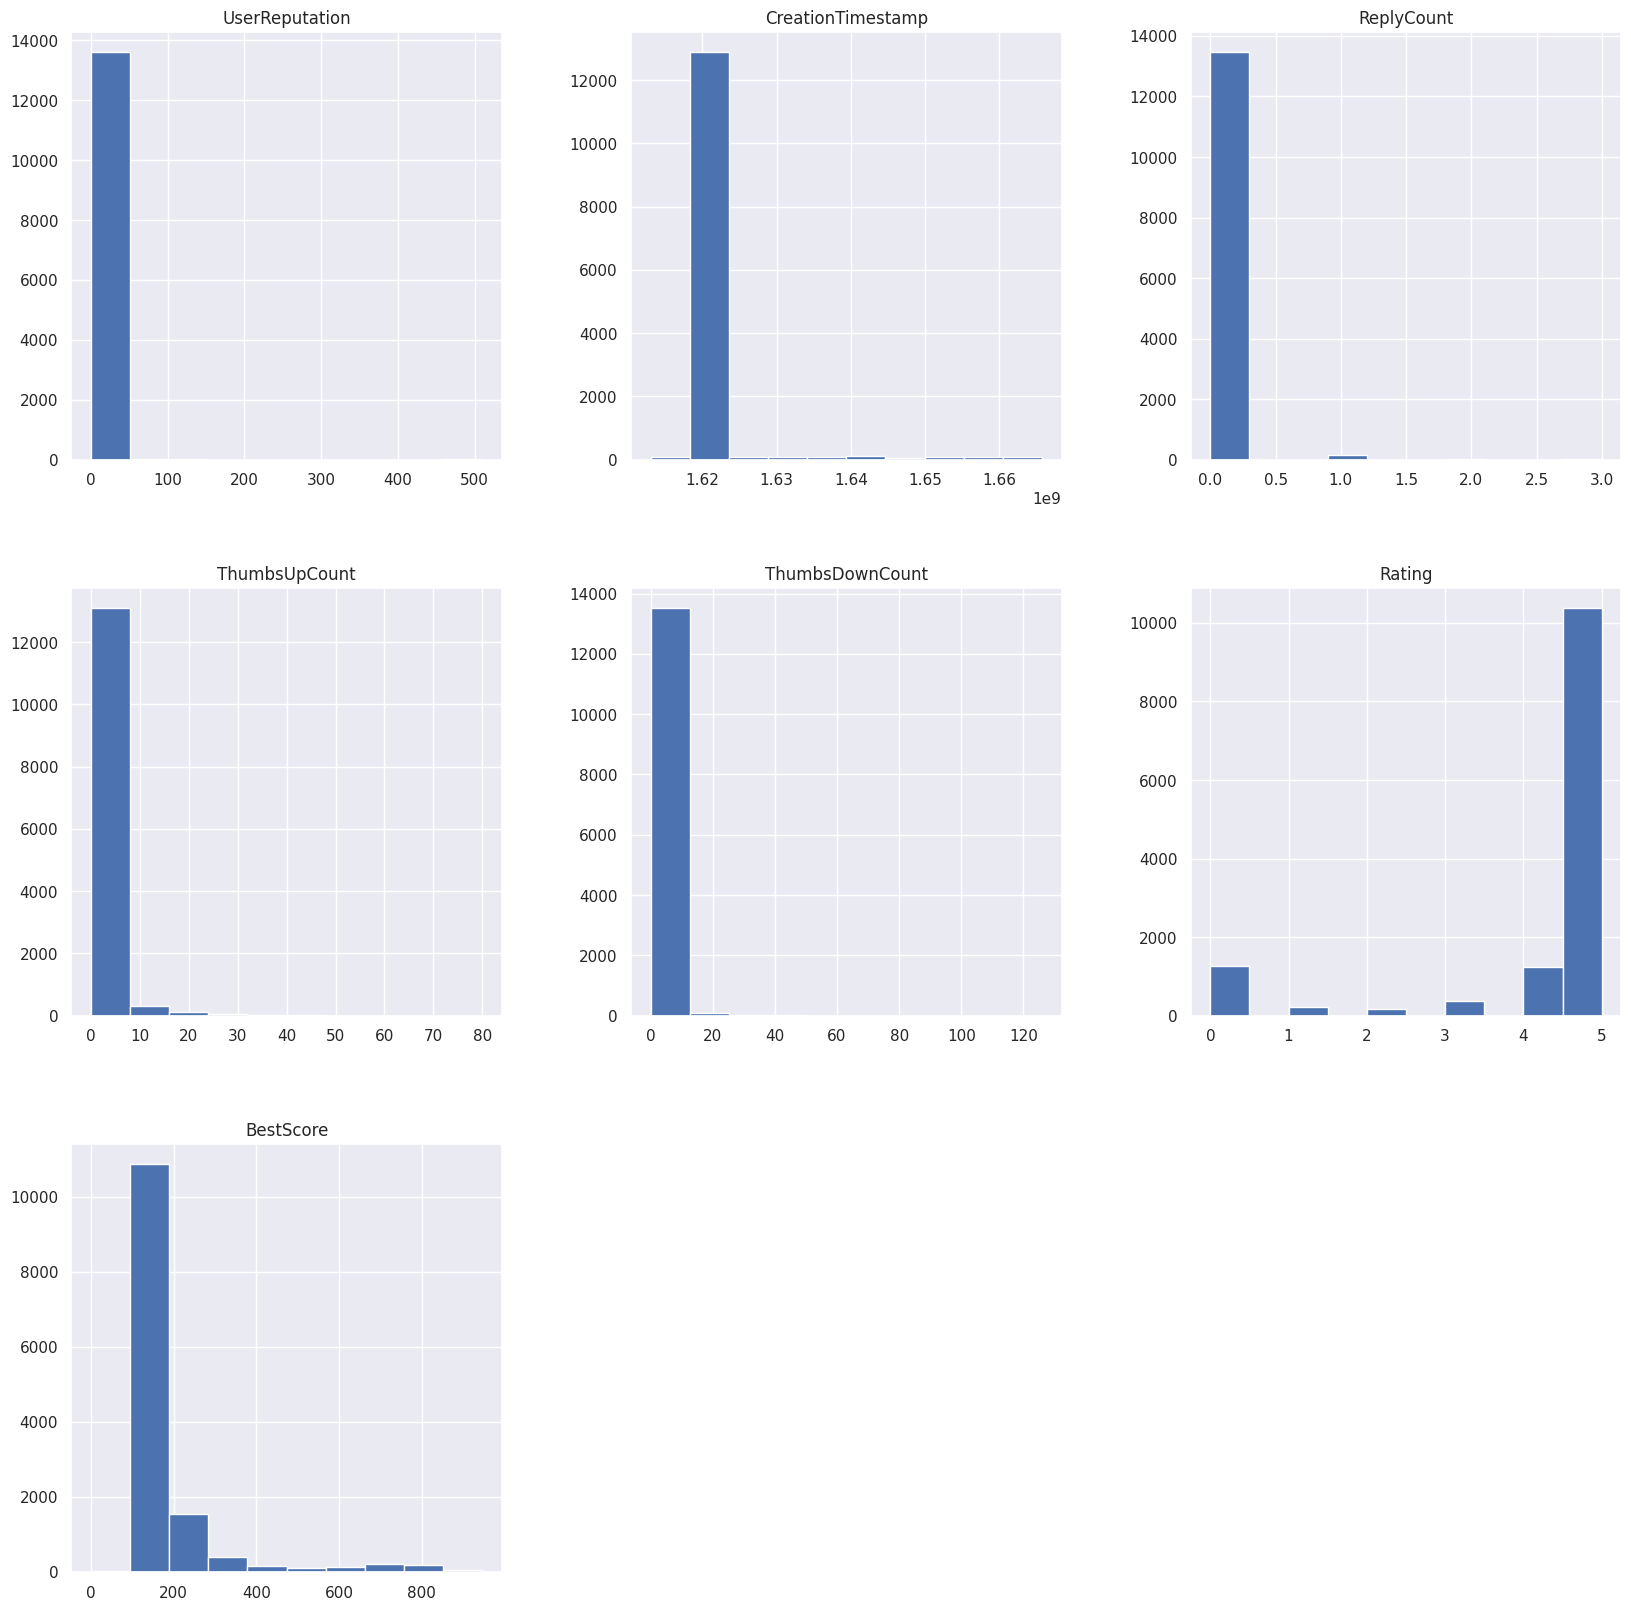

In [13]:
# To make Histogram graphs for numerical features in training dataset

sns.set()
num_df.hist(figsize=(20,20))

plt.show()

**Insights:**

From the above graphical representations, following can be inferred :

1. **Rating**

* Customers have rated the food recipes on the scale of 0 - 5, where 0 depicts the lowest and 5 the highest.
* Maximum no. of customers have rated the recipes '5' (more than 10,000 customers out of a total of 13636). This shows that the recipes has been taken quite well by the customers.
* This is followed by '0' and '4' (both crossing a 1000 boundary). This depicts that other than the customers who absolutely loved the recipes (rated '5'), most from the remaining lot, either quite hated the recipes (rated '0') or have been moderately happy with the same (rated '4').
* Customers who have felt the recipes are of average quality and hence have rated the same a '3', are next in line closely followed the customers who haven't been quite a fan of the same (and hence have rated '1' or '2').

2. **UserReputaion**

* Most of the Users have a score of 1.0 score (about 7000 in number).
* The maximum score is slightly higher than 500.0 (510.0 to be exact).

3. **CreationTimestamp**

* This column would be further analysed after feature engineering process. 

4. **ReplyCount**

* ReplyCount has a low value throughout the dataset, ranging from 0 to 3.

5. **ThumbsUpCount**

* Most of the thumbs up reactions on comments range between 0 - 25. 

6. **ThumbsDownCount**

* Similar to thumbs up reactions, thumbs down also range majorly between 0 - 25.

7. **BestScore**

* Most of the BestScore datapoints are concentrated in the range of 100 - 200.


### B. Scatter Plots : To find the relationship of feature columns with label column.

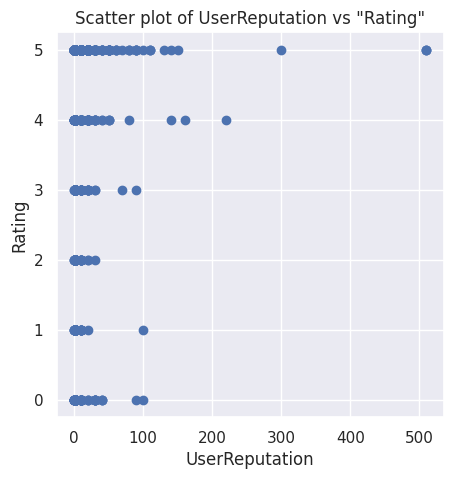

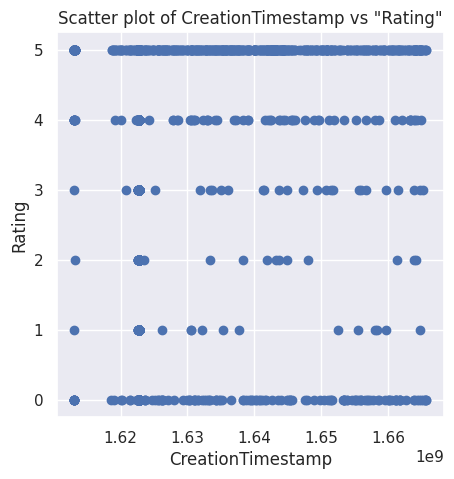

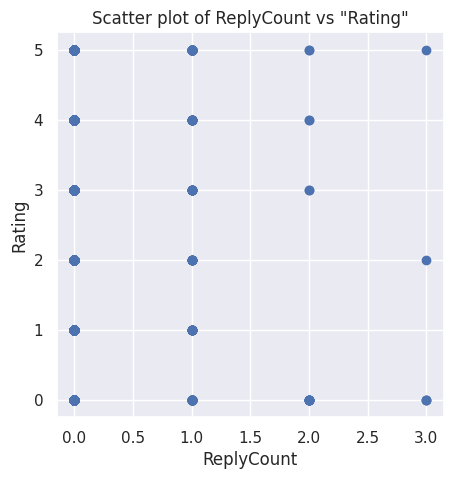

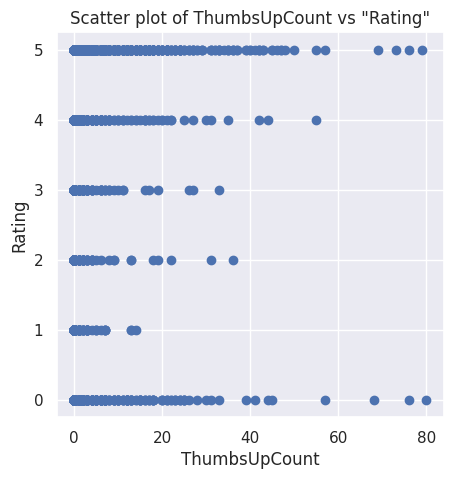

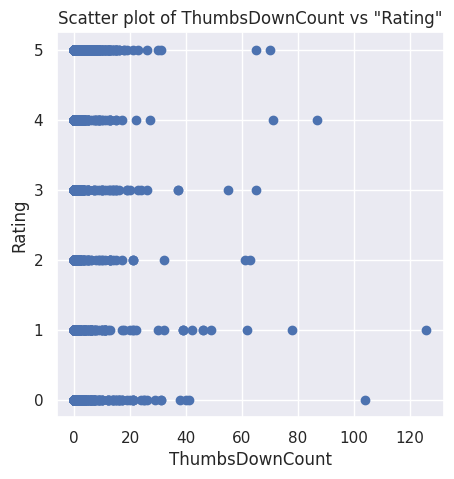

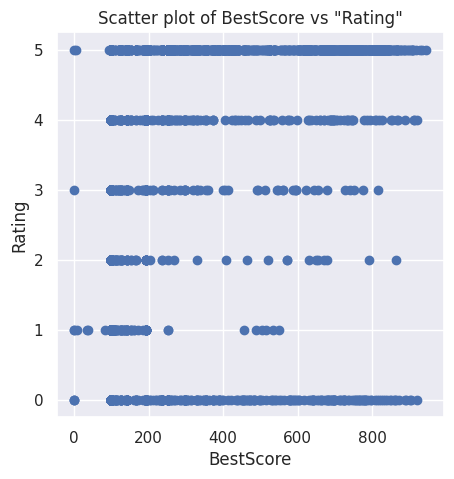

In [14]:
# To plot Scatter Plots

feature_columns = num_df.columns.drop('Rating')

for feature in feature_columns:
    plt.figure(figsize=(5,5))
    plt.scatter(num_df[feature], num_df['Rating'])
    plt.xlabel(feature)
    plt.ylabel('Rating')
    plt.title(f'Scatter plot of {feature} vs "Rating"')
    
    plt.show()

**Insights:** We can observe that most of the scatter plots above, depict horizontal lines emphasising on the independence nature of 'Rating' label column. This can be further explored through correlation matrix analysis.

## **3. Correlation Analysis using HeatMap**

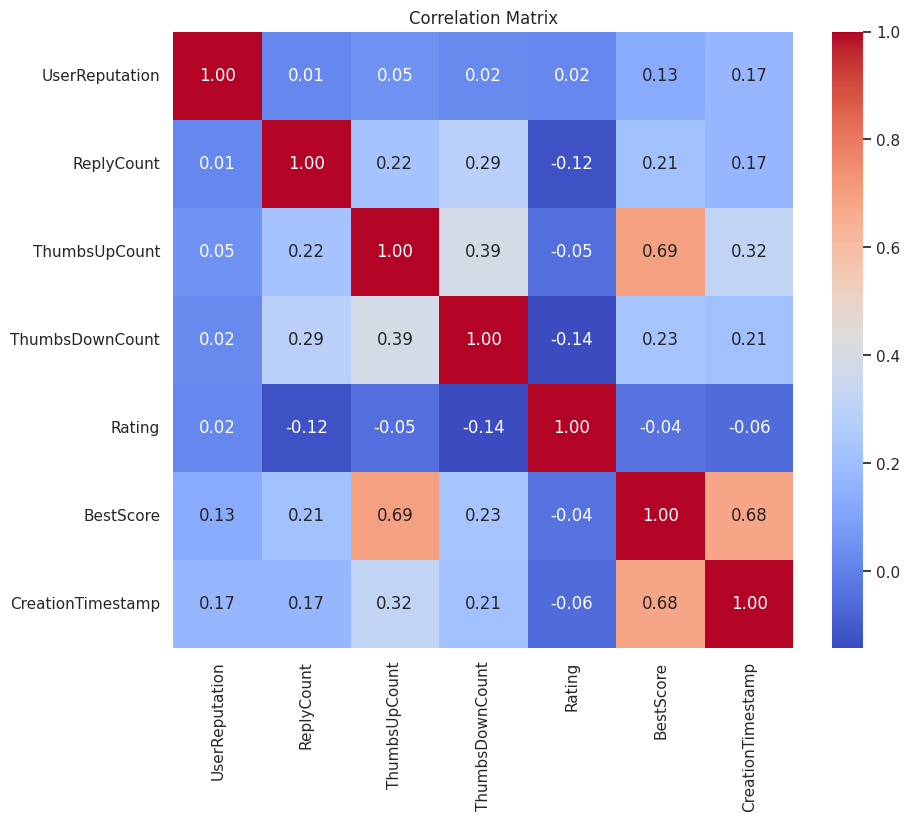

In [15]:
# Correlation Analysis

correlation_matrix = train_set[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Insights:** We can strongly say after the correlarion analysis that 'Rating' do not show sufficient direct dependencies on the above pictorically depicted attributes.

# **Data Preprocessing Processes**

## **1. Feature Engineering**

For the **'CreationTimestamp'** feature, so far we have been unable to draw important conclusions. Let's split the column into **'HourOfRating'** and **'DayOfRating'** for better understanding.

In [16]:
train_set['CreationTimestamp'] = pd.to_datetime(train_set['CreationTimestamp'], unit='s')
train_set['HourOfRating'] = train_set['CreationTimestamp'].dt.hour
train_set['DayOfRating'] = train_set['CreationTimestamp'].dt.dayofweek

In [17]:
# checking on train_set

train_set.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,HourOfRating,DayOfRating
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,2021-06-03 10:44:38,0,0,0,5,100,great recipe! I have made them just as written...,10,3
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,2021-06-03 10:57:32,0,0,1,5,100,This is an easy and quick recipe that is great...,10,3
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,2021-06-03 10:49:17,0,0,0,3,100,I think I was looking for something extra spec...,10,3
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,2021-06-02 15:48:19,0,0,0,5,100,This is our favorite grilled chicken recipe. ...,15,2
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,2021-06-03 11:04:20,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...,11,3


In [18]:
# Further, looking at the summary statistics of the new created columns

time_columns = ['HourOfRating','DayOfRating']
sum_stat = train_set[time_columns].describe()
print(sum_stat)

       HourOfRating   DayOfRating
count  13636.000000  13636.000000
mean      10.634717      2.958932
std        2.069485      0.494117
min        0.000000      0.000000
25%       10.000000      3.000000
50%       10.000000      3.000000
75%       11.000000      3.000000
max       23.000000      6.000000


## **2. Missing Data Values**

As, we last checked **'Recipe_Review'** had **2 missing data points**. Let's handle them out with **imputation**.

In [19]:
# Checking for missing values

train_set.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
HourOfRating         0
DayOfRating          0
dtype: int64

In [20]:
# Imputing the missing values

train_set.fillna('', inplace=True)

In [21]:
# Further, confirming the results

train_set.isna().sum().sum()

0

**Conclusion:** All missing data has been imputed. 'Recipe_Review' feature is no more having any missing value.

## **3. Duplicate Data**

We haven't looked into the possibility of the dataset containing any duplicates as of now. We would be further checking on the same. 

In [22]:
duplicates = train_set[train_set.duplicated()]

removing_duplicates = train_set.drop_duplicates()

print("Original:", train_set.shape)
print("Shape after removing duplicates:", removing_duplicates.shape)

Original: (13636, 17)
Shape after removing duplicates: (13636, 17)


**Conclusion:** The original shape of the dataset matches with the shape after the removal of duplicates, hence we conclude that the dataset lack the presence of any duplicates. 

## **4. Selecting feature columns of importance**

As of now, train_set contains features that aren't required for model building. In this step, we would be further on dropping the columns that aren't needed.

**Also, we would be transforming 'train_set' to 'trainset' for further data scaling processes.** 

In [23]:
# Checking on the basic gist of train_set

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 13636 non-null  int64         
 1   RecipeNumber       13636 non-null  int64         
 2   RecipeCode         13636 non-null  int64         
 3   RecipeName         13636 non-null  object        
 4   CommentID          13636 non-null  object        
 5   UserID             13636 non-null  object        
 6   UserName           13636 non-null  object        
 7   UserReputation     13636 non-null  int64         
 8   CreationTimestamp  13636 non-null  datetime64[ns]
 9   ReplyCount         13636 non-null  int64         
 10  ThumbsUpCount      13636 non-null  int64         
 11  ThumbsDownCount    13636 non-null  int64         
 12  Rating             13636 non-null  int64         
 13  BestScore          13636 non-null  int64         
 14  Recipe

In [24]:
# Dropping the columns of less importance

columns_to_drop = ['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID', 'UserName', 'CreationTimestamp']
trainset = train_set.drop(columns=columns_to_drop)

In [25]:
# Checking on newly formed trainset

trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserReputation   13636 non-null  int64 
 1   ReplyCount       13636 non-null  int64 
 2   ThumbsUpCount    13636 non-null  int64 
 3   ThumbsDownCount  13636 non-null  int64 
 4   Rating           13636 non-null  int64 
 5   BestScore        13636 non-null  int64 
 6   Recipe_Review    13636 non-null  object
 7   HourOfRating     13636 non-null  int32 
 8   DayOfRating      13636 non-null  int32 
dtypes: int32(2), int64(6), object(1)
memory usage: 852.4+ KB


In [26]:
# Checking that the trainset does not contain any null value.

trainset.isna().sum()

UserReputation     0
ReplyCount         0
ThumbsUpCount      0
ThumbsDownCount    0
Rating             0
BestScore          0
Recipe_Review      0
HourOfRating       0
DayOfRating        0
dtype: int64

## **5. Encoding Categorical Feature of Importance - 'Recipe_Review'**

**'Recipe_Review'**, a categorical column in the dataset is an important feature to consider and further transform the same for model training methods.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

t_vector = TfidfVectorizer(max_features=1000)
t_vector_features = t_vector.fit_transform(trainset['Recipe_Review'])

In [28]:
# Checking on t_vector_features

t_vector_features.shape

(13636, 1000)

## **6. Data Scaling for Numerical Features**

In this step, we would be scaling the numerical columns in trainset with **StandardScaler**.

In [29]:
from sklearn.preprocessing import StandardScaler

numerical_columns = trainset.select_dtypes(include=['int64','int32','float64']).columns

standscaler = StandardScaler()

trainset[numerical_columns] = standscaler.fit_transform(trainset[numerical_columns])

In [30]:
# Checking on the trainset

trainset.head()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,HourOfRating,DayOfRating
0,1.768748,-0.105742,-0.263606,-0.166499,0.460440,-0.376842,great recipe! I have made them just as written...,-0.306714,0.083117
1,-0.115041,-0.105742,-0.263606,0.139729,0.460440,-0.376842,This is an easy and quick recipe that is great...,-0.306714,0.083117
2,-0.115041,-0.105742,-0.263606,-0.166499,-0.834241,-0.376842,I think I was looking for something extra spec...,-0.306714,0.083117
3,-0.115041,-0.105742,-0.263606,-0.166499,0.460440,-0.376842,This is our favorite grilled chicken recipe. ...,2.109435,-1.940771
4,-0.115041,-0.105742,-0.263606,-0.166499,-0.186901,-0.376842,Great basic recipe. I added 2 teaspoons Tuscan...,0.176516,0.083117


## **7. Splitting trainset into training and validation sets**

As of now, we are done with most of the data preprocessing techniques. We would be splitting the training dataset to get started with model training. 

In [31]:
X = pd.concat([trainset[['UserReputation', 'HourOfRating', 'DayOfRating', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']], pd.DataFrame(t_vector_features.toarray())], axis=1)
y = train_set['Rating']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

## **8. Data Preprocessing for Test Dataset**

**All the processes that have imposed on the training dataset as of now, would be carried on the test datasets in a similar fashion.**


In [33]:
# Checking on testset

testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4546 non-null   int64 
 1   RecipeNumber       4546 non-null   int64 
 2   RecipeCode         4546 non-null   int64 
 3   RecipeName         4546 non-null   object
 4   CommentID          4546 non-null   object
 5   UserID             4546 non-null   object
 6   UserName           4546 non-null   object
 7   UserReputation     4546 non-null   int64 
 8   CreationTimestamp  4546 non-null   int64 
 9   ReplyCount         4546 non-null   int64 
 10  ThumbsUpCount      4546 non-null   int64 
 11  ThumbsDownCount    4546 non-null   int64 
 12  BestScore          4546 non-null   int64 
 13  Recipe_Review      4546 non-null   object
dtypes: int64(9), object(5)
memory usage: 497.3+ KB


In [34]:
# Creation of 'HourOfRating' and 'DayOfRating' for testset

testset['CreationTimestamp'] = pd.to_datetime(testset['CreationTimestamp'], unit='s')
testset['HourOfRating'] = testset['CreationTimestamp'].dt.hour
testset['DayOfRating'] = testset['CreationTimestamp'].dt.dayofweek

In [35]:
# Checking the presence of any null values in testset

testset.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
HourOfRating         0
DayOfRating          0
dtype: int64

In [36]:
# Encoding 'Recipe_Review' column in the testset

from sklearn.feature_extraction.text import TfidfVectorizer

tvf = t_vector.transform(testset['Recipe_Review'])

In [37]:
# Dropping less important columns from the testset

col_todrop =['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID', 'UserName', 'CreationTimestamp']

test_data = testset.drop(columns=col_todrop)

In [38]:
# Applying Data Scaling methods on numerical features of testset

from sklearn.preprocessing import StandardScaler

num_col = testset.select_dtypes(include=['int64','int32','float64']).columns

standscaler = StandardScaler()

testset[num_col] = standscaler.fit_transform(testset[num_col])

In [39]:
# Splitting the testset 

testset = pd.concat([testset[['UserReputation', 'HourOfRating', 'DayOfRating', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']], pd.DataFrame(tvf.toarray())], axis=1)
testset.columns = testset.columns.astype(str)

# **Model Training**

Now, that we are done with data preprocessing steps, we can start building models.

Models used:

* Baseline Model - DummyClassifier
* Logistic Regression (LR)
* K-Nearest Neighbors (KNN)
* Ramdom Forest Classifier (RFC)

## **Baseline Model**

In [40]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dc = DummyClassifier(strategy = "most_frequent")
dc.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [41]:
dc_pred = dc.predict(X_test)

dc_accuracy = accuracy_score(y_test, dc_pred)
print("Dummy Classifier Accuracy:", dc_accuracy)

Dummy Classifier Accuracy: 0.7554985337243402


In [42]:
dc_pred_test = dc.predict(testset)

print("Predictions for the test set:", dc_pred_test)

Predictions for the test set: [5 5 5 ... 5 5 5]


In [43]:
submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] = [__ for __ in range(1, len(dc_pred_test)+1)]
submission['Rating'] = dc_pred_test
submission.to_csv('submission.csv', index=False)

### Dummy Classifier Results:

Dummy Classifier Accuracy Score for training and validation sets : **0.7554985337243402**

Dummy Classifier Accuracy Score for test set : **0.76066**

### Confusion Matrix and Classification report of Dummy Classifier

In [44]:
from sklearn.metrics import confusion_matrix

cm_dc = confusion_matrix(y_test,dc_pred)
print(cm_dc)

[[   0    0    0    0    0  257]
 [   0    0    0    0    0   41]
 [   0    0    0    0    0   34]
 [   0    0    0    0    0   85]
 [   0    0    0    0    0  250]
 [   0    0    0    0    0 2061]]


In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       257
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        85
           4       0.00      0.00      0.00       250
           5       0.76      1.00      0.86      2061

    accuracy                           0.76      2728
   macro avg       0.13      0.17      0.14      2728
weighted avg       0.57      0.76      0.65      2728



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **1. Logistic Regression**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
lr_pred = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.7694281524926686


In [48]:
lr_pred_test = lr.predict(testset)

print("Predictions for the test set:", lr_pred_test)

Predictions for the test set: [5 5 5 ... 5 1 5]


In [49]:
submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] = [__ for __ in range(1, len(lr_pred_test)+1)]
submission['Rating'] = lr_pred_test
submission.to_csv('submission.csv', index=False)

### Logistic Regression Results:

Logistic Regression Accuracy Score for training and validation sets : **0.7694281524926686**

Logistic Regression Accuracy Score for test set : **0.77540**

### Confusion Matrix and Classification report of Logistic Regression

In [50]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,lr_pred)
print(cm_lr)

[[  25    2    2    4    6  218]
 [   4    8    0    2    4   23]
 [   1    3    1    6    4   19]
 [   7    3    1    8   17   49]
 [   7    0    0    2   30  211]
 [  15    0    0    1   18 2027]]


In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.42      0.10      0.16       257
           1       0.50      0.20      0.28        41
           2       0.25      0.03      0.05        34
           3       0.35      0.09      0.15        85
           4       0.38      0.12      0.18       250
           5       0.80      0.98      0.88      2061

    accuracy                           0.77      2728
   macro avg       0.45      0.25      0.28      2728
weighted avg       0.70      0.77      0.71      2728



## **2. K-Nearest Neighbour (KNN)**

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knnc = KNeighborsClassifier(n_neighbors=50)
knnc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [53]:
knnc_pred = knnc.predict(X_test)

knnc_accuracy = accuracy_score(y_test, knnc_pred)
print("KNN Classifier Accuracy:", knnc_accuracy)

KNN Classifier Accuracy: 0.7591642228739003


In [54]:
knnc_pred_test = knnc.predict(testset)

print("Predictions for the test set:", knnc_pred_test)

Predictions for the test set: [5 5 5 ... 5 5 5]


In [55]:
submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] = [__ for __ in range(1, len(knnc_pred_test)+1)]
submission['Rating'] = knnc_pred_test
submission.to_csv('submission.csv', index=False)

### KNN Algorithm Results:

KNN Algorithm Accuracy Score for training and validation sets : **0.7591642228739003**

KNN Algorithm Accuracy for Accuracy Score for test set : **0.76308**

### Confusion Matrix and Classification report of KNN

In [56]:
from sklearn.metrics import confusion_matrix

cm_knnc = confusion_matrix(y_test,knnc_pred)
print(cm_knnc)

[[   5    7    0    0    0  245]
 [   1    9    0    0    0   31]
 [   0    1    0    0    0   33]
 [   1    2    0    0    0   82]
 [   0    1    0    0    0  249]
 [   1    3    0    0    0 2057]]


In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knnc_pred))

              precision    recall  f1-score   support

           0       0.62      0.02      0.04       257
           1       0.39      0.22      0.28        41
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        85
           4       0.00      0.00      0.00       250
           5       0.76      1.00      0.86      2061

    accuracy                           0.76      2728
   macro avg       0.30      0.21      0.20      2728
weighted avg       0.64      0.76      0.66      2728



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **3. Random Forest Classifier (RFC)**

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
rfc_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, rfc_pred)
print("Random Forest Classifier Accuracy:", rfc_accuracy)

Random Forest Classifier Accuracy: 0.7620967741935484


In [60]:
rfc_pred_test = rfc.predict(testset)

print("Predictions for the test set:", rfc_pred_test)

Predictions for the test set: [5 5 5 ... 5 1 5]


In [61]:
submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] = [__ for __ in range(1, len(rfc_pred_test)+1)]
submission['Rating'] = rfc_pred_test
submission.to_csv('submission.csv', index=False)

### RFC Results:

RFC Accuracy Score for training and validation sets : **0.7631964809384164**

RFC Accuracy for Accuracy Score for test set : **0.7699**

### Confusion Matrix and Classification report of RFC

In [62]:
from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test,rfc_pred)
print(cm_rfc)

[[  13    0    0    0    0  244]
 [   3    1    0    0    0   37]
 [   0    0    0    1    0   33]
 [   1    0    0    4    2   78]
 [   1    0    0    2    6  241]
 [   4    0    0    0    2 2055]]


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.59      0.05      0.09       257
           1       1.00      0.02      0.05        41
           2       0.00      0.00      0.00        34
           3       0.57      0.05      0.09        85
           4       0.60      0.02      0.05       250
           5       0.76      1.00      0.87      2061

    accuracy                           0.76      2728
   macro avg       0.59      0.19      0.19      2728
weighted avg       0.72      0.76      0.67      2728



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Hyperparameter Tuning**

### **1. For Logistic Regression**

In [64]:
from sklearn.model_selection import GridSearchCV

parameter_grid_lr = {'C': [0.1, 1, 10], 'penalty': ['l2']}

gs_lr = GridSearchCV(lr, parameter_grid_lr, cv = 5, scoring = 'accuracy')
gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']},
             scoring='accuracy')

In [65]:
best_parameters_lr = gs_lr.best_params_
best_lr = gs_lr.best_estimator_

gs_lr_pred = best_lr.predict(X_test)

gs_lr_accuracy = accuracy_score(y_test, gs_lr_pred)
print("LR Hyperparameter tuning Accuracy:", gs_lr_accuracy)

LR Hyperparameter tuning Accuracy: 0.7694281524926686


In [66]:
gs_lr_pred_test = gs_lr.best_estimator_.predict(testset)

In [67]:
submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] = [__ for __ in range(1, len(gs_lr_pred_test)+1)]
submission['Rating'] = gs_lr_pred_test
submission.to_csv('submission.csv', index=False)

### Logistic Regression Hyperparameter tuning Results:

Logistic Regression Hyperparameter tuning Accuracy Score for training and validation sets : **0.7694281524926686**

Logistic Regression Hyperparameter tuning Accuracy Score for test set : **0.77540**

### Confusion Matrix and Classification report of LR after Hyperparameter tuning

In [68]:
cm_lr_hy = confusion_matrix(y_test,gs_lr_pred)
print(cm_lr_hy)

[[  25    2    2    4    6  218]
 [   4    8    0    2    4   23]
 [   1    3    1    6    4   19]
 [   7    3    1    8   17   49]
 [   7    0    0    2   30  211]
 [  15    0    0    1   18 2027]]


In [69]:
print(classification_report(y_test, gs_lr_pred))

              precision    recall  f1-score   support

           0       0.42      0.10      0.16       257
           1       0.50      0.20      0.28        41
           2       0.25      0.03      0.05        34
           3       0.35      0.09      0.15        85
           4       0.38      0.12      0.18       250
           5       0.80      0.98      0.88      2061

    accuracy                           0.77      2728
   macro avg       0.45      0.25      0.28      2728
weighted avg       0.70      0.77      0.71      2728



### **2. For KNN Algorithm**

In [70]:
from sklearn.model_selection import GridSearchCV

parameter_grid_knnc = {'n_neighbors': [3, 5, 7, 9, 11]}

gs_knnc = GridSearchCV(knnc, parameter_grid_knnc, cv = 5)
gs_knnc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=50),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [71]:
best_parameters_knnc = gs_knnc.best_params_
best_knnc = gs_knnc.best_estimator_

gs_knnc_pred = best_knnc.predict(X_test)

gs_knnc_accuracy = accuracy_score(y_test, gs_knnc_pred)
print("KNN Hyperparameter tuning Accuracy:", gs_knnc_accuracy)

KNN Hyperparameter tuning Accuracy: 0.7532991202346041


In [72]:
gs_knnc_pred_test = gs_knnc.best_estimator_.predict(testset)

In [73]:
submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] = [__ for __ in range(1, len(gs_knnc_pred_test)+1)]
submission['Rating'] = gs_knnc_pred_test
submission.to_csv('submission.csv', index=False)

### KNN Algorithm Hyperparameter tuning Results:

KNN Algorithm Hyperparameter tuning Accuracy Score for training and validation sets : **0.7532991202346041**

KNN Algorithm Hyperparameter tuning Accuracy for Accuracy Score for test set : **0.76154**

### Confusion Matrix and Classification report of KNN after Hyperparameter tuning

In [74]:
cm_knnc_hy = confusion_matrix(y_test,gs_knnc_pred)
print(cm_knnc_hy)

[[   8    8    0    0    1  240]
 [   2    9    1    1    0   28]
 [   0    2    0    0    0   32]
 [   5    0    1    0    1   78]
 [   2    0    1    1    1  245]
 [  19    3    1    0    1 2037]]


In [75]:
print(classification_report(y_test, gs_knnc_pred))

              precision    recall  f1-score   support

           0       0.22      0.03      0.05       257
           1       0.41      0.22      0.29        41
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        85
           4       0.25      0.00      0.01       250
           5       0.77      0.99      0.86      2061

    accuracy                           0.75      2728
   macro avg       0.27      0.21      0.20      2728
weighted avg       0.63      0.75      0.66      2728



### **3. For Random Forest Classifier**

In [76]:
#from sklearn.model_selection import GridSearchCV

parameter_grid_rfc = {'n_estimators': [100],
                      'max_depth': [None, 10, 20],
                      'min_samples_split': [2, 5, 10]}

gs_rfc = GridSearchCV(rfc, parameter_grid_rfc, cv = 5)
gs_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]})

In [77]:
best_parameters_rfc = gs_rfc.best_params_
best_rfc = gs_rfc.best_estimator_

gs_rfc_pred = best_rfc.predict(X_test)

gs_rfc_accuracy = accuracy_score(y_test, gs_rfc_pred)
print("RFC Hyperparameter tuning Accuracy:", gs_rfc_accuracy)

RFC Hyperparameter tuning Accuracy: 0.7624633431085044


In [78]:
gs_rfc_pred_test = gs_rfc.best_estimator_.predict(testset)

In [79]:
submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] = [__ for __ in range(1, len(gs_rfc_pred_test)+1)]
submission['Rating'] = gs_rfc_pred_test
submission.to_csv('submission.csv', index=False)

### RFC Hyperparameter tuning Results:

RFC Hyperparameter tuning Accuracy Score for training and validation sets : **0.7624633431085044**

RFC Hyperparameter tuning Accuracy Score for test set : **0.76968**

### Confusion Matrix and Classification report of RFC after Hyperparameter tuning

In [80]:
cm_rfc_hy = confusion_matrix(y_test,gs_rfc_pred)
print(cm_rfc_hy)

[[  14    0    0    0    1  242]
 [   3    1    0    0    0   37]
 [   0    1    0    0    0   33]
 [   1    0    0    5    2   77]
 [   2    0    0    1    5  242]
 [   5    0    0    0    1 2055]]


In [81]:
print(classification_report(y_test, gs_rfc_pred))

              precision    recall  f1-score   support

           0       0.56      0.05      0.10       257
           1       0.50      0.02      0.05        41
           2       0.00      0.00      0.00        34
           3       0.83      0.06      0.11        85
           4       0.56      0.02      0.04       250
           5       0.77      1.00      0.87      2061

    accuracy                           0.76      2728
   macro avg       0.54      0.19      0.19      2728
weighted avg       0.72      0.76      0.67      2728



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Model Accuracy Comparision**

To compare the accuracy scores obtained through different models, we would plot a graph.

**1. Comparision between models accuracy score**

A. Testset without hyperparameter tuning

B. Trainset without hyperparameter tuning

C. Testset after hyperparameter tuning

D. Trainset after hyperparameter tuning

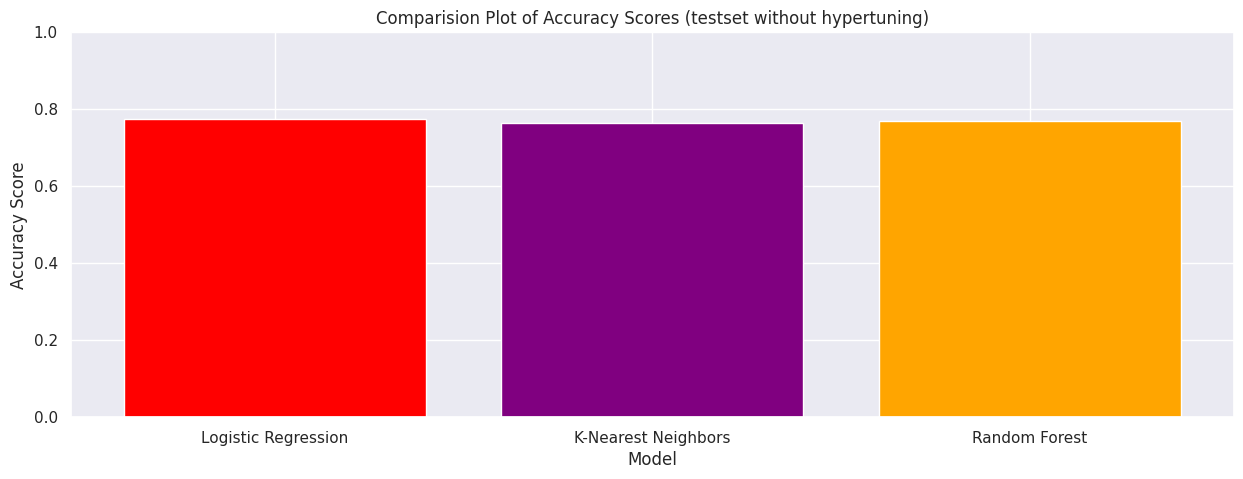

In [82]:
# For testset without hyperparameter tuning

models_test = {
    'Logistic Regression': 0.77540,
    'K-Nearest Neighbors': 0.76308,
    'Random Forest': 0.76990
}

plt.figure(figsize=(15, 5))
plt.bar(models_test.keys(), models_test.values(), color=['red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparision Plot of Accuracy Scores (testset without hypertuning)') 
plt.ylim(0.000, 1.000)
plt.show()

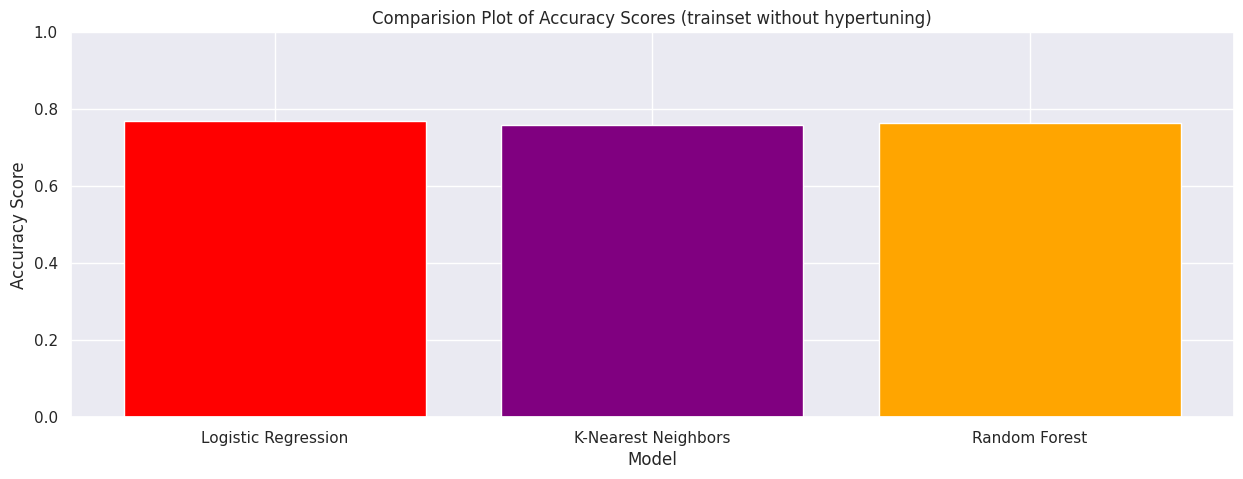

In [83]:
# For trainset without hyperparameter tuning

models_train = {
    'Logistic Regression': 0.7694281524926686,
    'K-Nearest Neighbors': 0.7591642228739003,
    'Random Forest': 0.7631964809384164
}

plt.figure(figsize=(15, 5))
plt.bar(models_train.keys(), models_train.values(), color=['red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparision Plot of Accuracy Scores (trainset without hypertuning)')
plt.ylim(0.000, 1.000)
plt.show()

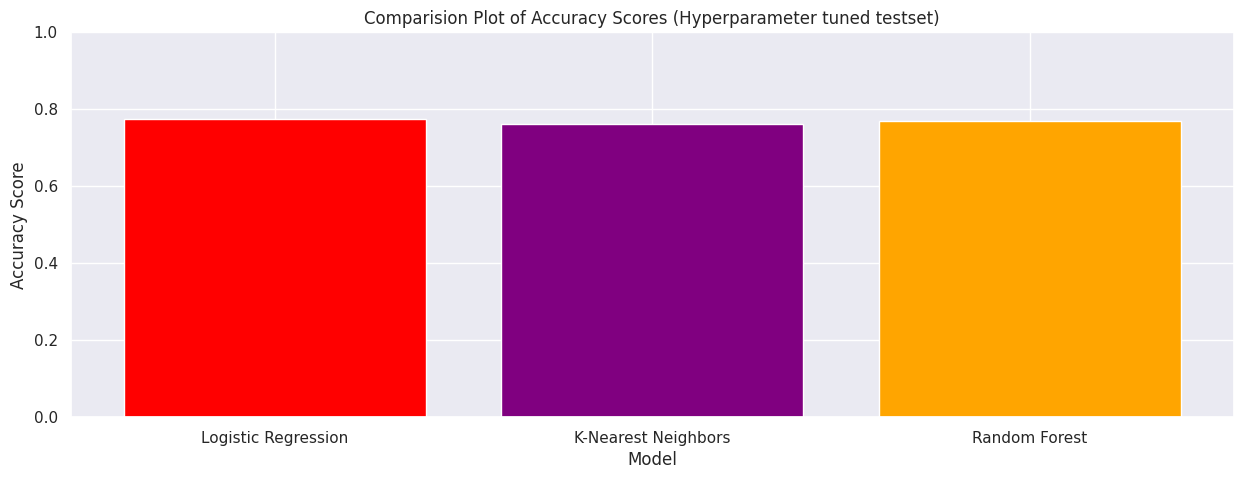

In [84]:
# For Hyperparameter tuned testset

hp_models_test = {
    'Logistic Regression': 0.77540,
    'K-Nearest Neighbors': 0.76154,
    'Random Forest': 0.76968
}

plt.figure(figsize=(15, 5))
plt.bar(hp_models_test.keys(), hp_models_test.values(), color=['red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparision Plot of Accuracy Scores (Hyperparameter tuned testset)')
plt.ylim(0.000, 1.000) 
plt.show()

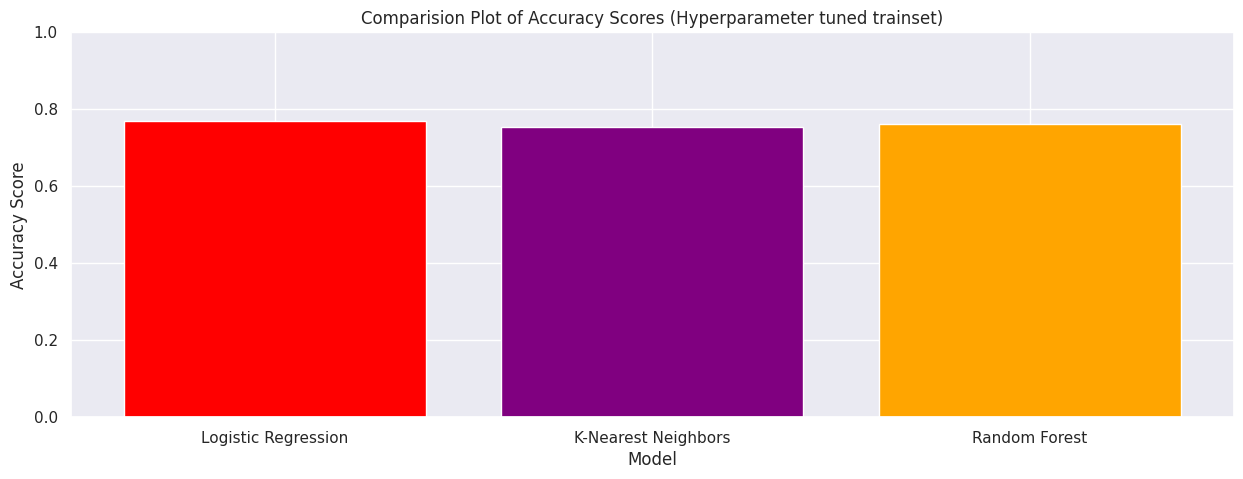

In [85]:
# For Hyperparameter tuned trainset

hp_models_train = {
    'Logistic Regression': 0.7694281524926686,
    'K-Nearest Neighbors': 0.7532991202346041,
    'Random Forest': 0.7624633431085044
}

plt.figure(figsize=(15, 5))
plt.bar(hp_models_train.keys(), hp_models_train.values(), color=['red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparision Plot of Accuracy Scores (Hyperparameter tuned trainset)')
plt.ylim(0.000, 1.000) 
plt.show()

**2. Comparision of accuracy score before and after hyperparameter tuning**

A. Logistic Regression

B. K-Nearest Neighbors

C. Random Forest Classifier

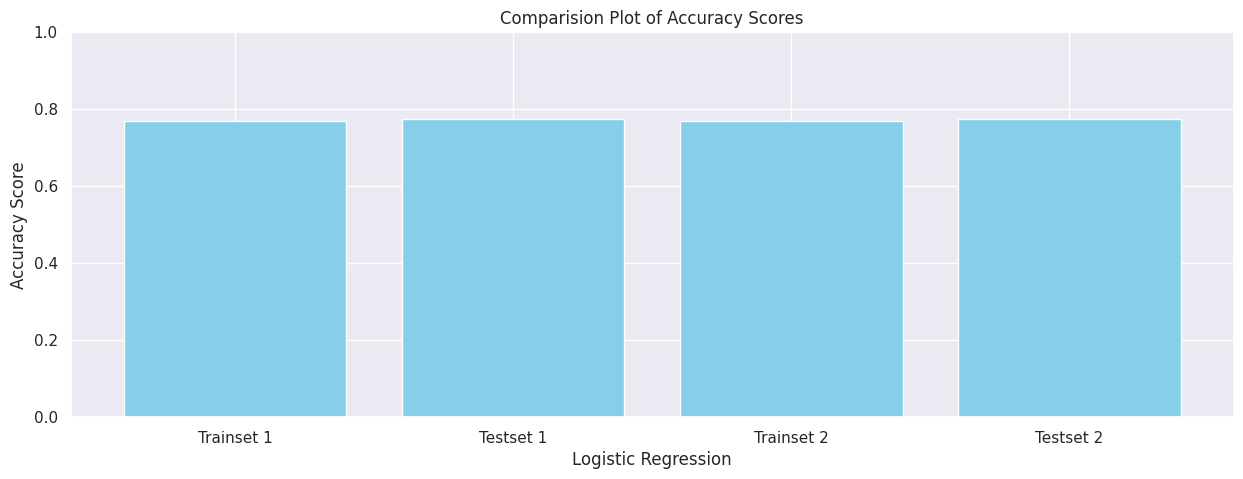

In [86]:
# For Logistic Regression

lr_comparision = {
    'Trainset 1': 0.7694281524926686, #Trainset Before Hyperparameter Tuning
    'Testset 1': 0.77540,  #Testset Before Hyperparameter Tuning
    'Trainset 2': 0.7694281524926686,  #Trainset After Hyperparameter Tuning
    'Testset 2': 0.77540    #Testset After Hyperparameter Tuning
}

plt.figure(figsize=(15, 5))
plt.bar(lr_comparision.keys(), lr_comparision.values(), color=['skyblue'])
plt.xlabel('Logistic Regression')
plt.ylabel('Accuracy Score')
plt.title('Comparision Plot of Accuracy Scores')
plt.ylim(0.00, 1.00) 
plt.show()

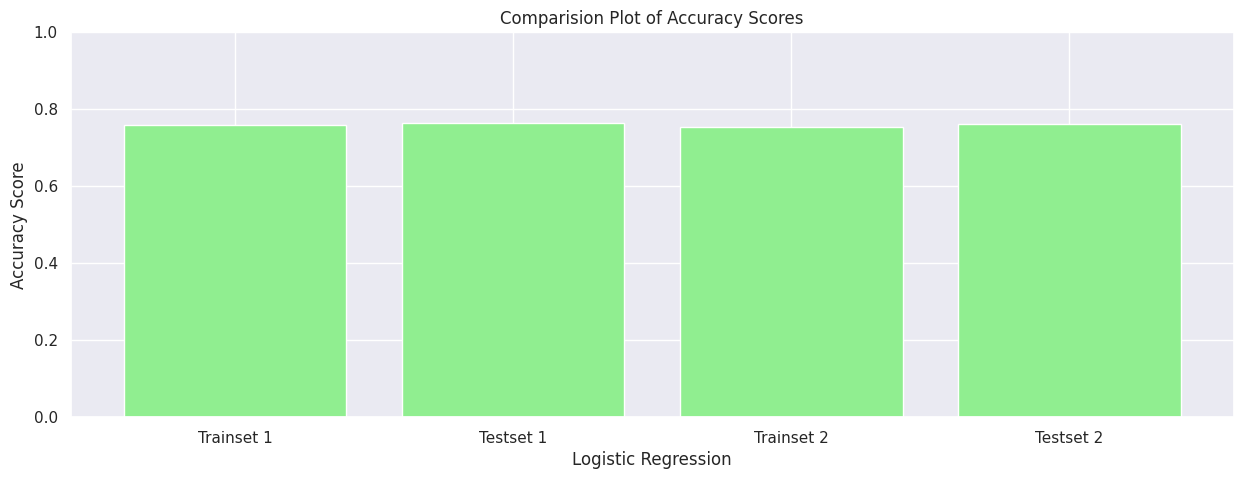

In [87]:
# For KNN

knnc_comparision = {
    'Trainset 1': 0.7591642228739003, #Trainset Before Hyperparameter Tuning
    'Testset 1': 0.76308,  #Testset Before Hyperparameter Tuning
    'Trainset 2': 0.7532991202346041,  #Trainset After Hyperparameter Tuning
    'Testset 2': 0.76154    #Testset After Hyperparameter Tuning
}

plt.figure(figsize=(15, 5))
plt.bar(knnc_comparision.keys(), knnc_comparision.values(), color=['lightgreen'])
plt.xlabel('Logistic Regression')
plt.ylabel('Accuracy Score')
plt.title('Comparision Plot of Accuracy Scores')
plt.ylim(0.00, 1.00) 
plt.show()

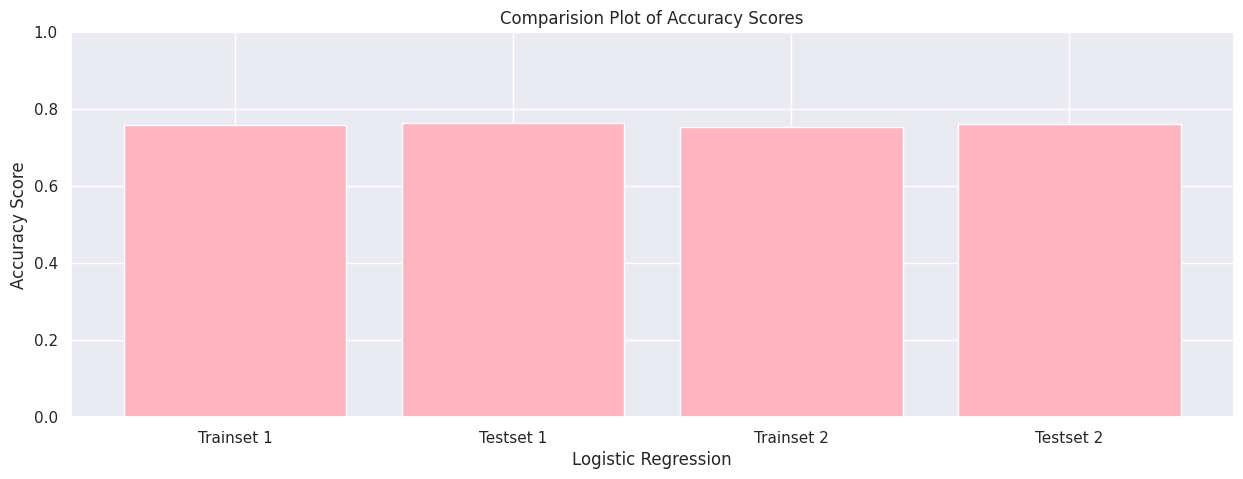

In [88]:
# For RFC

rfc_comparision = {
    'Trainset 1': 0.7591642228739003, #Trainset Before Hyperparameter Tuning
    'Testset 1': 0.76308,  #Testset Before Hyperparameter Tuning
    'Trainset 2': 0.7532991202346041,  #Trainset After Hyperparameter Tuning
    'Testset 2': 0.76154    #Testset After Hyperparameter Tuning
}

plt.figure(figsize=(15, 5))
plt.bar(rfc_comparision.keys(), rfc_comparision.values(), color=['lightpink'])
plt.xlabel('Logistic Regression')
plt.ylabel('Accuracy Score')
plt.title('Comparision Plot of Accuracy Scores')
plt.ylim(0.00, 1.00) 
plt.show()